Thống kê tổng hợp:
                Age       Gender  Item Purchased     Category  \
count  3900.000000  3900.000000     3900.000000  3900.000000   
mean     44.068462     0.680000       12.035385     1.001795   
std      15.207589     0.466536        7.199162     0.896688   
min      18.000000     0.000000        0.000000     0.000000   
25%      31.000000     0.000000        6.000000     0.000000   
50%      44.000000     1.000000       12.000000     1.000000   
75%      57.000000     1.000000       18.000000     1.000000   
max      70.000000     1.000000       24.000000     3.000000   

       Purchase Amount (USD)     Location         Size        Color  \
count            3900.000000  3900.000000  3900.000000  3900.000000   
mean               59.764359    24.266410     1.120000    12.109487   
std                23.685392    14.343299     0.930496     7.221592   
min                20.000000     0.000000     0.000000     0.000000   
25%                39.000000    12.000000     0.

<Figure size 1000x600 with 0 Axes>

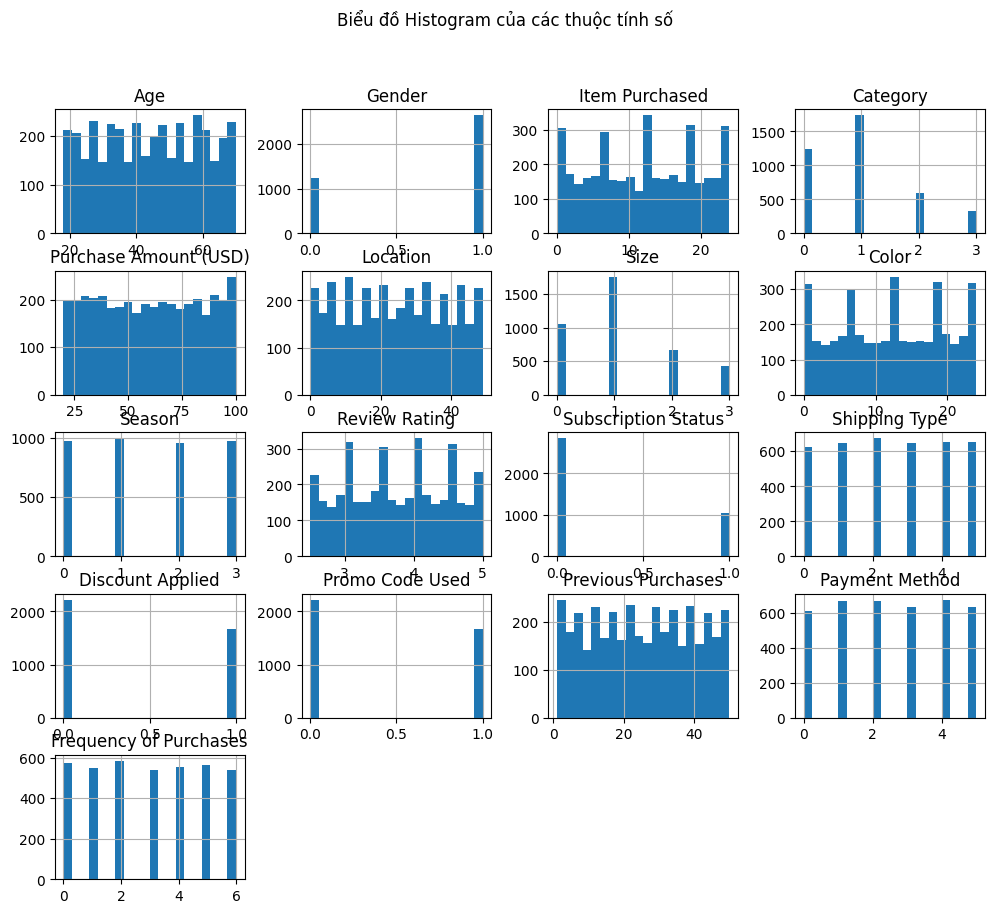

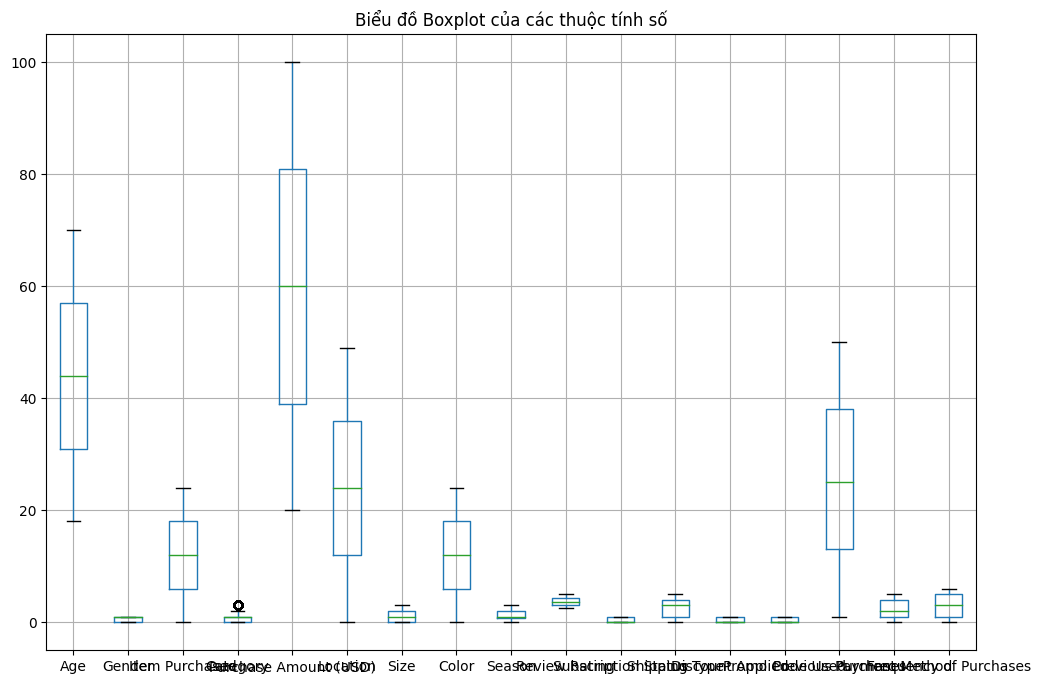

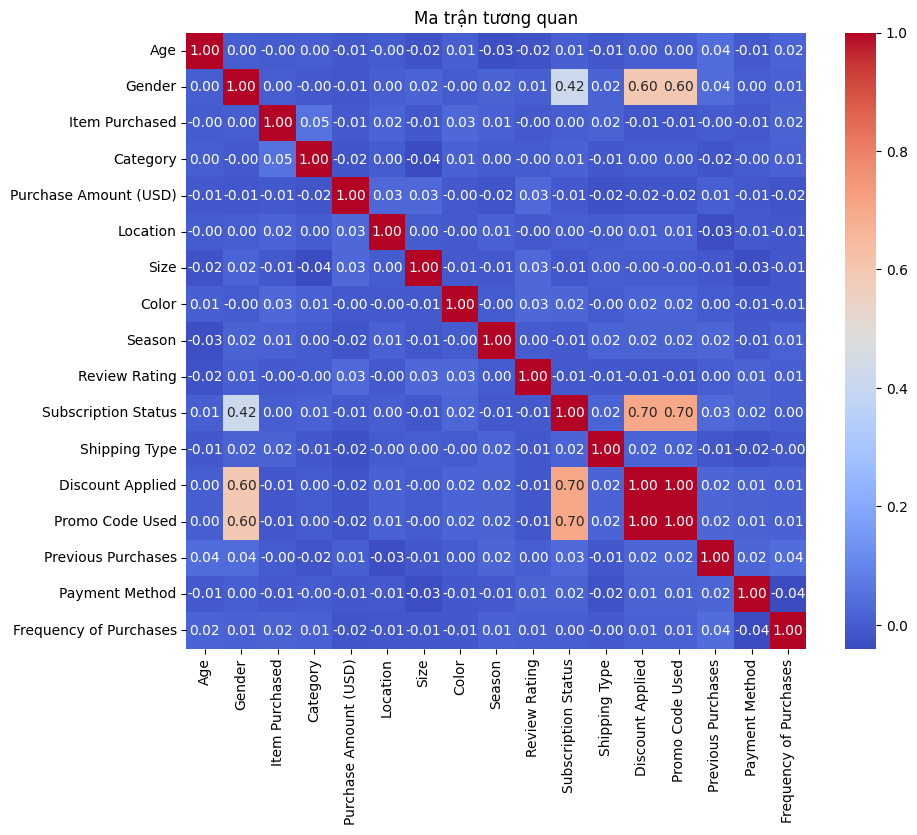

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

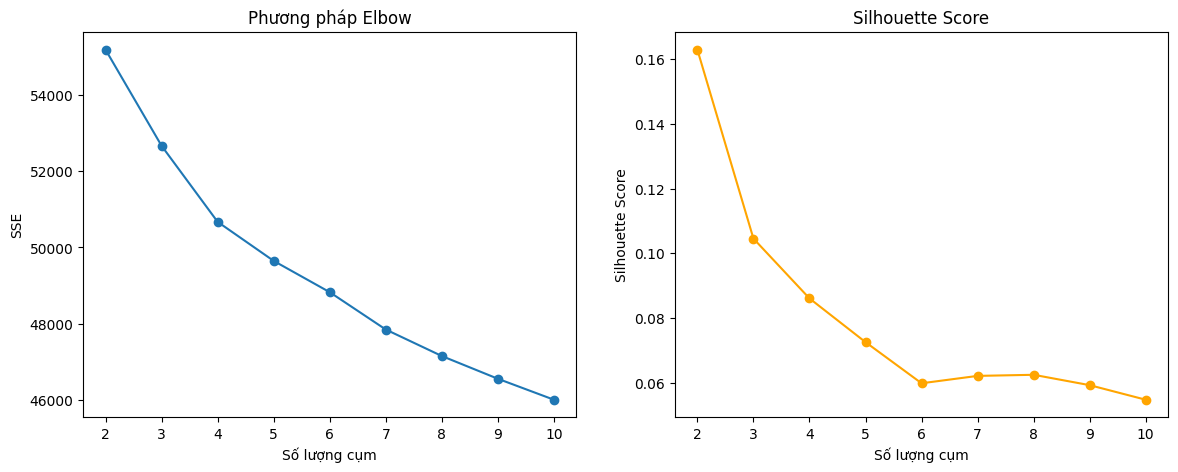

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Số lượng điểm trong mỗi cụm:
 Cluster
1    1248
2    1053
3     975
0     624
Name: count, dtype: int64


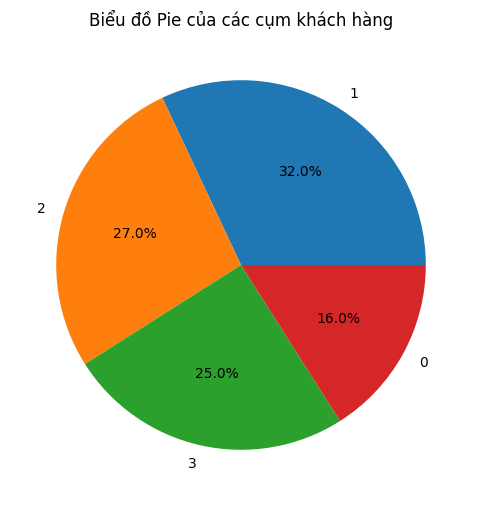

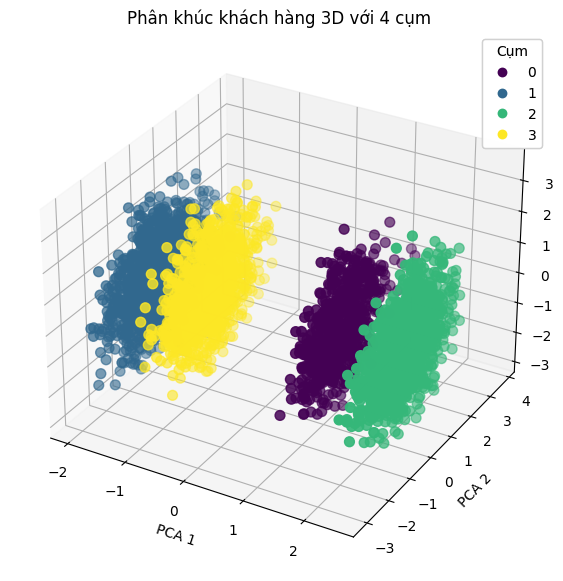


Đặc điểm của cụm 0:
              Age  Gender  Item Purchased    Category  Purchase Amount (USD)  \
count  624.000000   624.0      624.000000  624.000000             624.000000   
mean    44.000000     1.0       11.663462    0.975962              58.919872   
std     15.827521     0.0        7.265580    0.903568              23.894162   
min     18.000000     1.0        0.000000    0.000000              20.000000   
25%     30.000000     1.0        5.000000    0.000000              36.000000   
50%     43.000000     1.0       12.000000    1.000000              59.000000   
75%     58.000000     1.0       18.000000    1.000000              79.000000   
max     70.000000     1.0       24.000000    3.000000             100.000000   

         Location        Size       Color      Season  Review Rating  \
count  624.000000  624.000000  624.000000  624.000000     624.000000   
mean    24.615385    1.152244   12.115385    1.562500       3.734936   
std     14.252464    0.926285    7.401758 

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Tải dữ liệu
file_path = '/content/shopping_trends_updated.csv'
data = pd.read_csv(file_path)

# Tiền xử lý
# Tách các cột số và không phải số
numeric_columns = data.select_dtypes(include=['number']).columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns

# Xử lý giá trị thiếu
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
data[non_numeric_columns] = data[non_numeric_columns].fillna(data[non_numeric_columns].mode().iloc[0])

# Mã hóa các biến phân loại (nếu có)
for column in non_numeric_columns:
    data[column] = LabelEncoder().fit_transform(data[column])

# Chuẩn hóa dữ liệu
data1 = data.drop(['Customer ID'], axis=1, inplace=True)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

summary_statistics = data.describe(include='all')
print("Thống kê tổng hợp:\n", summary_statistics)

# Biểu đồ histogram
plt.figure(figsize=(10, 6))
data.hist(bins=20, figsize=(12, 10))
plt.suptitle('Biểu đồ Histogram của các thuộc tính số')
plt.show()

# Biểu đồ boxplot
plt.figure(figsize=(12, 8))
data.boxplot()
plt.title('Biểu đồ Boxplot của các thuộc tính số')
plt.show()

# Ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Ma trận tương quan')
plt.show()

# Phương pháp Elbow để xác định số lượng cụm tối ưu
sse = []
silhouette_scores = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Vẽ biểu đồ Elbow và Silhouette Score
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, sse, marker='o')
plt.title('Phương pháp Elbow')
plt.xlabel('Số lượng cụm')
plt.ylabel('SSE')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Số lượng cụm')
plt.ylabel('Silhouette Score')

plt.show()

# Số lượng cụm tối ưu dựa trên Elbow và Silhouette Score
optimal_k = 4  # Giả sử là 4 cụm dựa trên biểu đồ

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Thêm nhãn cụm vào dữ liệu gốc
data['Cluster'] = clusters

# In ra số lượng điểm trong mỗi cụm
cluster_counts = data['Cluster'].value_counts()
print("Số lượng điểm trong mỗi cụm:\n", cluster_counts)

# Biểu đồ Pie cho các cụm khách hàng
plt.figure(figsize=(8, 6))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%')
plt.title('Biểu đồ Pie của các cụm khách hàng')
plt.show()

# Giảm dữ liệu xuống 3D bằng PCA để trực quan hóa
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_data)

# Vẽ biểu đồ các cụm trong 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Vẽ biểu đồ phân tán
scatter = ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=clusters, cmap='viridis', s=50)

# Nhãn và tiêu đề
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title(f'Phân khúc khách hàng 3D với {optimal_k} cụm')

# Thanh màu
legend = ax.legend(*scatter.legend_elements(), title="Cụm")
ax.add_artist(legend)

plt.show()

# Phân tích thống kê mô tả cho từng cụm
for cluster_num in range(optimal_k):
    print(f"\nĐặc điểm của cụm {cluster_num}:")
    cluster_data = data[data['Cluster'] == cluster_num]
    print(cluster_data.describe(include='all'))
